In [ ]:
# Importing numpy to help with linear algebra and importing pandas to help with file reading and data processing
import numpy as np
import pandas as pd 

# Printing all files under the input directory, as only those files in those directories can be used as input (this was meant more so as a precaution for the Kaggle Kernel development environment)
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/colorization/checkpoint-trained.pth.tar
/kaggle/input/colorization/resnet_gray_weights.pth.tar
/kaggle/input/colorization/test_bw_images/test_black_white_images-v2/2e6e0a48e1f5a336.jpg
/kaggle/input/colorization/test_bw_images/test_black_white_images-v2/2f626f0fb1a84fbf.jpg
/kaggle/input/colorization/test_bw_images/test_black_white_images-v2/619937f451e67d27.jpg
/kaggle/input/colorization/test_bw_images/test_black_white_images-v2/769a79b43bc050f6.jpg
/kaggle/input/colorization/test_bw_images/test_black_white_images-v2/65e3b64a81765929.jpg
/kaggle/input/colorization/test_bw_images/test_black_white_images-v2/4ff12598b0b651bf.jpg
/kaggle/input/colorization/test_bw_images/test_black_white_images-v2/23b43d43a750986c.jpg
/kaggle/input/colorization/test_bw_images/test_black_white_images-v2/5242a6099cb29a7d.jpg
/kaggle/input/colorization/test_bw_images/test_black_white_images-v2/48aecba55d38f76c.jpg
/kaggle/input/colorization/test_bw_images/test_black_white_images-v2/74b166b25b26

In [ ]:
# Loading the data which is preloaded as .npy files (numpy files) in order to make pre-processing easier 
gray_scale_images = np.load('../input/image-colorization/l/gray_scale.npy') 
ab1_images = np.load("../input/image-colorization/ab/ab/ab1.npy")
ab2_images = np.load('../input/image-colorization/ab/ab/ab2.npy')
ab3_images = np.load('../input/image-colorization/ab/ab/ab3.npy')

# Loading the Data / Data Exploration

In [ ]:
# Outputting all of the grayscale images in the numpy file
gray_scale_images

array([[[237, 135,  75, ...,  35,  37,  63],
        [234, 152,  72, ...,  41,  49,  47],
        [215, 216, 104, ...,  73,  48,  82],
        ...,
        [ 40,  45,  38, ...,  11,   8,   8],
        [ 40,  56,  47, ...,   8,   7,  10],
        [ 42,  60,  79, ...,  12,  13,  15]],

       [[202, 204, 207, ..., 133, 136, 138],
        [199, 199, 200, ..., 123, 128, 134],
        [196, 159, 153, ..., 110,  76, 131],
        ...,
        [222, 200, 194, ...,  98, 108, 166],
        [224, 224, 224, ..., 165, 166, 165],
        [224, 227, 227, ..., 170, 168, 167]],

       [[ 37,  37,  40, ..., 218, 218, 218],
        [ 36,  38,  40, ..., 217, 217, 217],
        [ 38,  39,  40, ..., 217, 217, 217],
        ...,
        [ 13,  56, 144, ..., 220, 221, 216],
        [ 12,  27, 145, ..., 226, 228, 238],
        [ 14,  18,  83, ..., 220, 212, 233]],

       ...,

       [[ 13,  33,  32, ...,  26,  33,  12],
        [ 62, 183, 180, ..., 155, 189,  65],
        [ 73, 199, 195, ..., 209, 219,  78

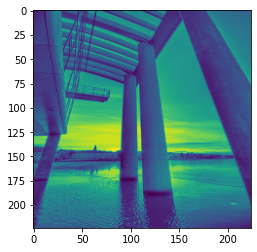

In [ ]:
len(gray_scale_images)
plt.imshow(gray_scale_images[5])

In [ ]:
len(ab1_images)
ab1_images

array([[[[129, 136],
         [126, 134],
         [126, 135],
         ...,
         [125, 132],
         [124, 134],
         [124, 135]],

        [[127, 137],
         [126, 136],
         [126, 133],
         ...,
         [127, 131],
         [125, 133],
         [123, 137]],

        [[127, 138],
         [127, 134],
         [127, 134],
         ...,
         [125, 131],
         [126, 131],
         [128, 133]],

        ...,

        [[126, 131],
         [126, 131],
         [127, 131],
         ...,
         [126, 130],
         [126, 130],
         [126, 130]],

        [[126, 131],
         [127, 131],
         [126, 132],
         ...,
         [126, 130],
         [126, 130],
         [126, 130]],

        [[127, 131],
         [127, 133],
         [128, 135],
         ...,
         [126, 130],
         [124, 130],
         [126, 130]]],


       [[[121, 124],
         [121, 125],
         [121, 126],
         ...,
         [141, 125],
         [145, 125],
         [144

In [ ]:
# In using Kaggle Kernels, I only have access to 16gbs of ram - which only supports roughly a maximum of 3000 images
# If I could train on more of the data, the results would've been far more accurate and precise
Xtrain = gray_scale_images[:3000]
Ytrain = ab1_images[:3000]

# The generalized model, ImageNet requires images to be a certain shape, as such we need to convert the shape from (224, 224, 1) to (224, 224, 3) using numpy
Xtrain = np.repeat(Xtrain[..., np.newaxis], 3, -1)

# # By subtracting and subsequently dividing by 127.5, we are normalizing the data in the range [-1, 1]. 
# These images would otherwise be in the range [0, 1], since we are working with LAB, this technique of normalizing works better
Xtrain = (Xtrain.astype('float32') - 127.5) / 127.5
Ytrain = (Ytrain.astype('float32') - 127.5) / 127.5

In [ ]:
Xtrain

array([[[[ 0.85882354,  0.85882354,  0.85882354],
         [ 0.05882353,  0.05882353,  0.05882353],
         [-0.4117647 , -0.4117647 , -0.4117647 ],
         ...,
         [-0.7254902 , -0.7254902 , -0.7254902 ],
         [-0.70980394, -0.70980394, -0.70980394],
         [-0.5058824 , -0.5058824 , -0.5058824 ]],

        [[ 0.8352941 ,  0.8352941 ,  0.8352941 ],
         [ 0.19215687,  0.19215687,  0.19215687],
         [-0.43529412, -0.43529412, -0.43529412],
         ...,
         [-0.6784314 , -0.6784314 , -0.6784314 ],
         [-0.6156863 , -0.6156863 , -0.6156863 ],
         [-0.6313726 , -0.6313726 , -0.6313726 ]],

        [[ 0.6862745 ,  0.6862745 ,  0.6862745 ],
         [ 0.69411767,  0.69411767,  0.69411767],
         [-0.18431373, -0.18431373, -0.18431373],
         ...,
         [-0.42745098, -0.42745098, -0.42745098],
         [-0.62352943, -0.62352943, -0.62352943],
         [-0.35686275, -0.35686275, -0.35686275]],

        ...,

        [[-0.6862745 , -0.6862745 , -0

# Creating the Model Architecture

In [ ]:

# Source: https://github.com/emilwallner/Coloring-greyscale-images/blob/master/Full-version/full_version.ipynb

# This project uses a transfer learning model that is generalized on a wide range of images
# Below is the model architecture which has taken partially from the above links due to my lack of experience with such models

# Importing the transfer learning model and preparing the kernel initializer values to initialise the weights and distribute them 
from tensorflow.keras.applications import MobileNetV2
weight_init = RandomNormal(stddev=0.02) 

# Preparing the Input layer
input_layer = Input((224, 224, 3))

# Downloading mobile net  trained on the imagenet dataset containing 1.4 million images and using it as the base of the model
# In using this model, we utilize its weights, but do not use its connected Dense Layer (#include_top=False), and instead build our own layer  atop the model
pre_trained_model = MobileNetV2(
    input_shape= (224, 224, 3),
    include_top=False, 
    weights='imagenet'
)
mobilenet = pre_trained_model(input_layer)


# Source: https://github.com/emilwallner/Coloring-greyscale-images/blob/master/Full-version/full_version.ipynb
# Defining the model architecture, (decoders and encoders)
# Encoder
# 224x224
conv1 = Conv2D(64, (3, 3), strides=(2, 2), padding='same', kernel_initializer=weight_init)(input_layer)
conv1 = LeakyReLU(alpha=0.2)(conv1)

# 112x112
conv2 = Conv2D(128, (3, 3), strides=(1, 1), padding='same', kernel_initializer=weight_init)(conv1)
conv2 = LeakyReLU(alpha=0.2)(conv2)

# 112x112
conv3 = Conv2D(128, (3, 3), strides=(2, 2), padding='same', kernel_initializer=weight_init)(conv2)
conv3 =  Activation('relu')(conv3)

# 56x56
conv4 = Conv2D(256, (3, 3), strides=(2, 2), padding='same', kernel_initializer=weight_init)(conv3)
conv4 = Activation('relu')(conv4)

# 28x28
conv4_ = Conv2D(256, (3, 3), strides=(1, 1), padding='same', kernel_initializer=weight_init)(conv4)
conv4_ = Activation('relu')(conv4_)

# 28x28
conv5 = Conv2D(512, (3, 3), strides=(2, 2), padding='same', kernel_initializer=weight_init)(conv4_)
conv5 = Activation('relu')(conv5)

# 14x14
conv5_ = Conv2D(256, (3, 3), strides=(2, 2), padding='same', kernel_initializer=weight_init)(conv5)
conv5_ = Activation('relu')(conv5_)

#7x7
# Fusion layer - Connects MobileNet with our encoder
conc = concatenate([mobilenet, conv5_])
fusion = Conv2D(512, (1, 1), padding='same', kernel_initializer=weight_init)(conc)
fusion = Activation('relu')(fusion)

# Skip fusion layer
skip_fusion = concatenate([fusion, conv5_])

# Decoder 
# 7x7
decoder = Conv2DTranspose(512, (3, 3), strides=(2, 2), padding='same', kernel_initializer=weight_init)(skip_fusion)
decoder = Activation('relu')(decoder)
decoder = Dropout(0.25)(decoder)

# Skip layer from conv5 (with added dropout)
skip_4_drop = Dropout(0.25)(conv5) # Drops 1/4 of the neurons to prevent overfitting 
skip_4 = concatenate([decoder, skip_4_drop])

# 14x14
decoder = Conv2DTranspose(256, (3, 3), strides=(2, 2), padding='same', kernel_initializer=weight_init)(skip_4)
decoder = Activation('relu')(decoder)
decoder = Dropout(0.25)(decoder)

# Skip layer from conv4_ (with added dropout)
skip_3_drop = Dropout(0.25)(conv4_)
skip_3 = concatenate([decoder, skip_3_drop])

# 28x28
decoder = Conv2DTranspose(128, (3, 3), strides=(2, 2), padding='same', kernel_initializer=weight_init)(skip_3)
decoder = Activation('relu')(decoder)
decoder = Dropout(0.25)(decoder)

# 56x56
decoder = Conv2DTranspose(64, (3, 3), strides=(2, 2), padding='same', kernel_initializer=weight_init)(decoder)
decoder = Activation('relu')(decoder)
decoder = Dropout(0.25)(decoder)

# 112x112
decoder = Conv2DTranspose(64, (3, 3), strides=(1, 1), padding='same', kernel_initializer=weight_init)(decoder)
decoder = Activation('relu')(decoder)

# 112x112
decoder = Conv2DTranspose(32, (3, 3), strides=(2, 2), padding='same', kernel_initializer=weight_init)(decoder)
decoder = Activation('relu')(decoder)

# 224x224
# Ooutput layer, with 2 channels (a and b)
output_layer = Conv2D(2, (1, 1), activation='tanh')(decoder)

model = Model(input_layer, output_layer)
model.compile(Adam(lr=0.0002), loss='mse', metrics=['accuracy'])

9412608/9406464 [==============================] - 0s 0us/step


In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 112, 112, 64) 1792        input_1[0][0]                    
__________________________________________________________________________________________________
leaky_re_lu (LeakyReLU)         (None, 112, 112, 64) 0           conv2d[0][0]                     
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 112, 112, 128 73856       leaky_re_lu[0][0]                
______________________________________________________________________________________________

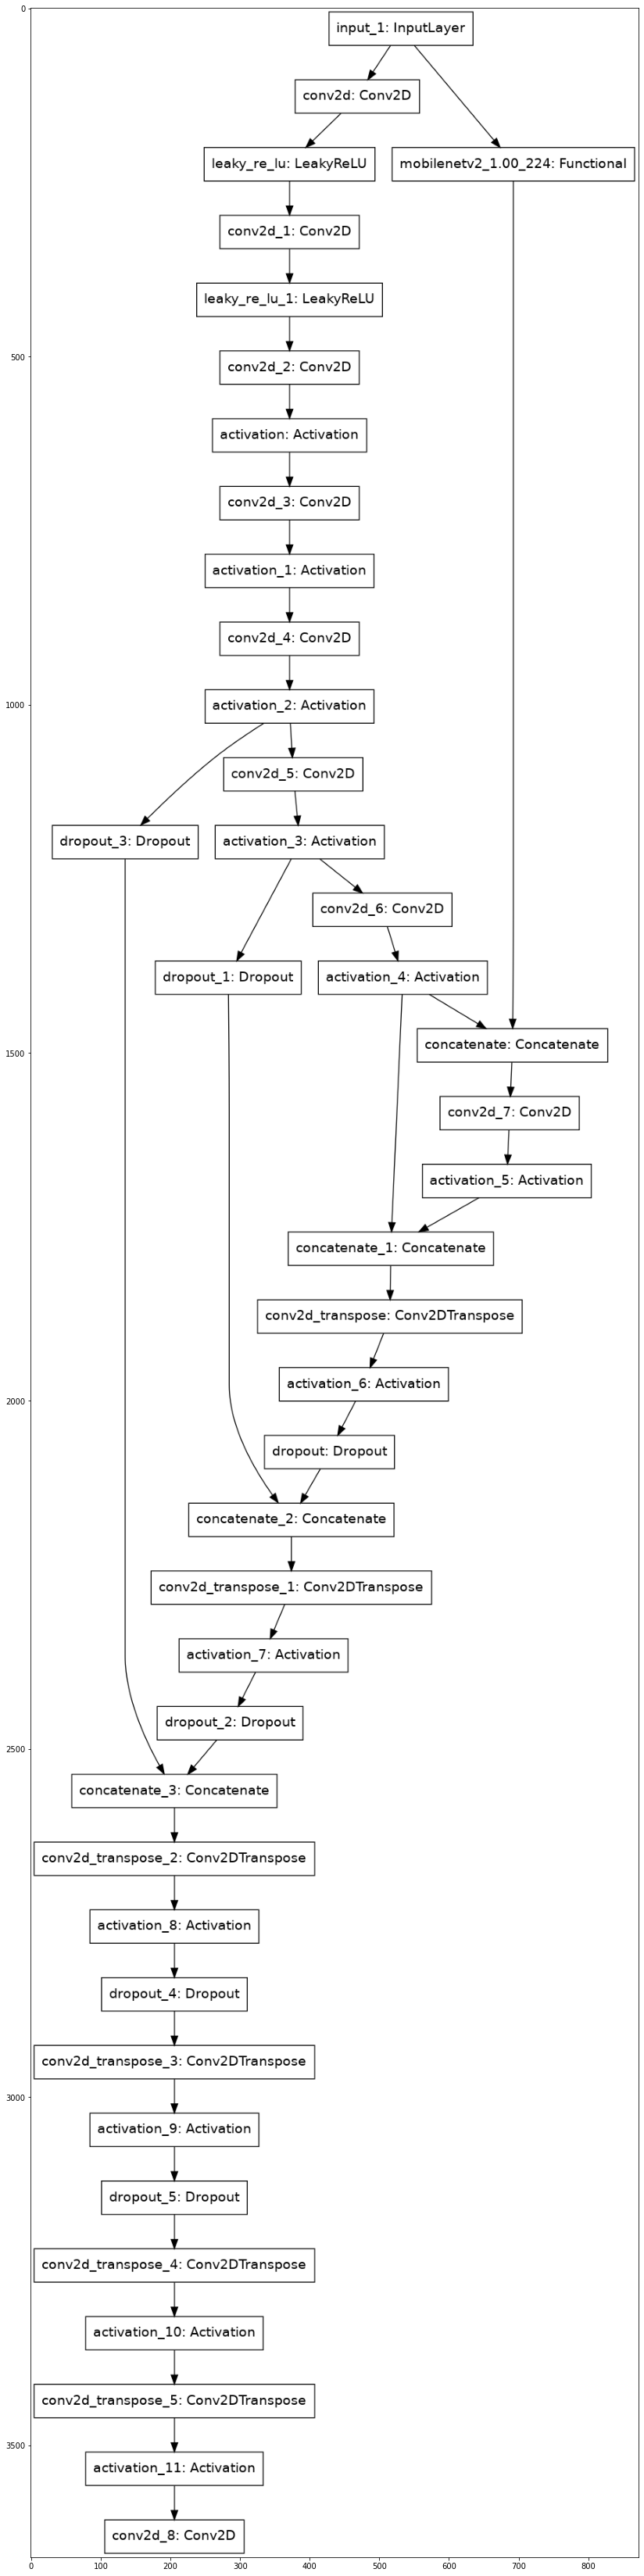

In [ ]:
# Plotting the Model Diagram 
plot_model(model, 'final_model_diagram.png')
plt.figure(figsize=(160, 60))
plt.imshow(Image.open('final_model_diagram.png'))

# Training the Model

In [ ]:
# Loading the model weights from the input directory
model.load_weights('../input/model-weights/saved_model_weights.h5')

In [ ]:
# This model will be fed grayscale images or the L (light) component of LAB and it will then try to predict the AB component which refer to the four colors of human vision
# Because of limitations with RAM and VRAM on Kaggle Kernels, the model will only be trained for 40 epochs with 32 images in each training batch 
# In order to see how the model is performing on unfamiliar data, 5% of the training will be split for validation 

history = model.fit(Xtrain, Ytrain, epochs = 40, batch_size = 32, validation_split = 0.05)

Epoch 1/40
90/90 [==============================] - 75s 706ms/step - loss: 0.0188 - accuracy: 0.5156 - val_loss: 0.0180 - val_accuracy: 0.5261
Epoch 2/40
90/90 [==============================] - 60s 665ms/step - loss: 0.0163 - accuracy: 0.5007 - val_loss: 0.0170 - val_accuracy: 0.5261
Epoch 3/40
90/90 [==============================] - 60s 665ms/step - loss: 0.0145 - accuracy: 0.5583 - val_loss: 0.0172 - val_accuracy: 0.5975
Epoch 4/40
90/90 [==============================] - 60s 664ms/step - loss: 0.0134 - accuracy: 0.6370 - val_loss: 0.0175 - val_accuracy: 0.5818
Epoch 5/40
90/90 [==============================] - 60s 665ms/step - loss: 0.0124 - accuracy: 0.6607 - val_loss: 0.0175 - val_accuracy: 0.5769
Epoch 6/40
90/90 [==============================] - 60s 666ms/step - loss: 0.0118 - accuracy: 0.6628 - val_loss: 0.0180 - val_accuracy: 0.5798
Epoch 7/40
90/90 [==============================] - 60s 663ms/step - loss: 0.0113 - accuracy: 0.6785 - val_loss: 0.0185 - val_accuracy: 0.5891

In [ ]:
# Saving the entire model as an h5 file
model.save('saved_model.h5')

# Saving the model weights as an h5 file
model.save_weights('saved_model_weights.h5')

In [ ]:
# Plotting the accuracy and loss of the model
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()

AttributeError: 'NoneType' object has no attribute 'history'

# Predictions

In [ ]:
# Importing image library from Keras and images from the /input directory
from keras.preprocessing import image
good = '../input/colorization/train_black_white_images-v2/train_black_white_images-v2/00005903203677bc.jpg'
path = '../input/results/image0.jpg'

# Loading the image into a variable and then converting to an array
img = image.load_img(path, target_size=(224, 224, 1), color_mode = 'grayscale')
x = image.img_to_array(img)


In [ ]:
x.shape

(224, 224, 1)

In [ ]:
# Preprocessing the image in order to make inferences and predictions

# In order to meet the requirments for MobileNet, we need to convert the shape from (224, 224, 1) to (224, 224, 3)
x_l_repeated = np.repeat(x[..., np.newaxis], 3, -1) # To match the input shape, the L value is repeated
x_l_repeated = x_l_repeated.reshape((1, 224, 224, 3))

# Normalizing the input for prediction
x_l_repeated = (x_l_repeated.astype('float32') - 127.5) / 127.5

# Predicting the AB (color) compenents of LAB 
prediction = model.predict(x_l_repeated)

# Normalizing the output in a range between [-1, 1]
final_prediction = (prediction[0].astype('float32') * 127.5) + 127.5
grayscale_image = x.reshape((224, 224, 1))


In [ ]:

# Combining the L (grayscale) image with the predicted AB component and combining them to form a colourized image
LAB_image = np.concatenate((x, final_prediction), axis=2)
LAB_image = LAB_image.astype("uint8")

# The cvtColor method is used to convert images from different colour spaces to another colour space using OpenCV
RGB_image = cv2.cvtColor(LAB_image, cv2.COLOR_LAB2RGB) 

# Converting the array back into an image with the RGB colour code
RGB_image = Image.fromarray(RGB_image)

In [ ]:
# pred = get_pred(model, x)

# image = get_LAB(x, pred)

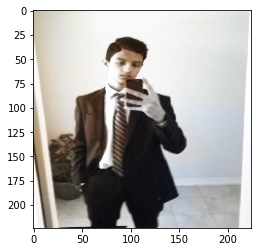

In [ ]:
# Outputting/plotting the final colourized image
plt.imshow(RGB_image)